## Homework: Reproduce the plot from lecture 2 slide 32 for Watts-Strogatz model
- Measure the clustering coefficient and average path length for different p and N (Try to predict and observe what happens as $N \to \infty$)
- For the clustering coefficient use your own implementation (not the networkx function)

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time, math

In [3]:
# def nx_clustering_coefficient(G):
#     clustering = nx.clustering(G)
#     avg_clustering_coeff = sum(clustering.values()) / len(clustering)
#     return avg_clustering_coeff

def my_clustering_coefficient(G):
    clustering_coeffs = {}

    for node in G.nodes():
        neighbors = set(G.neighbors(node))
        k = len(neighbors)

        if k < 2:
            clustering_coeffs[node] = 0.0
            continue

        visited = set([node])
        num_links = 0
        for neighbor_node in neighbors:
            neighbors_of_neighbor = set(G.neighbors(neighbor_node))
            neighbors_of_neighbor.intersection_update(neighbors)
            neighbors_of_neighbor.difference_update(visited)
            num_links += len(neighbors_of_neighbor)
            visited.add(neighbor_node)
        
        possible_links = k * (k - 1) // 2
        clustering_coeffs[node] = num_links / possible_links
    
    return sum(clustering_coeffs.values()) / len(clustering_coeffs)


10
50
100
500
1000
5000


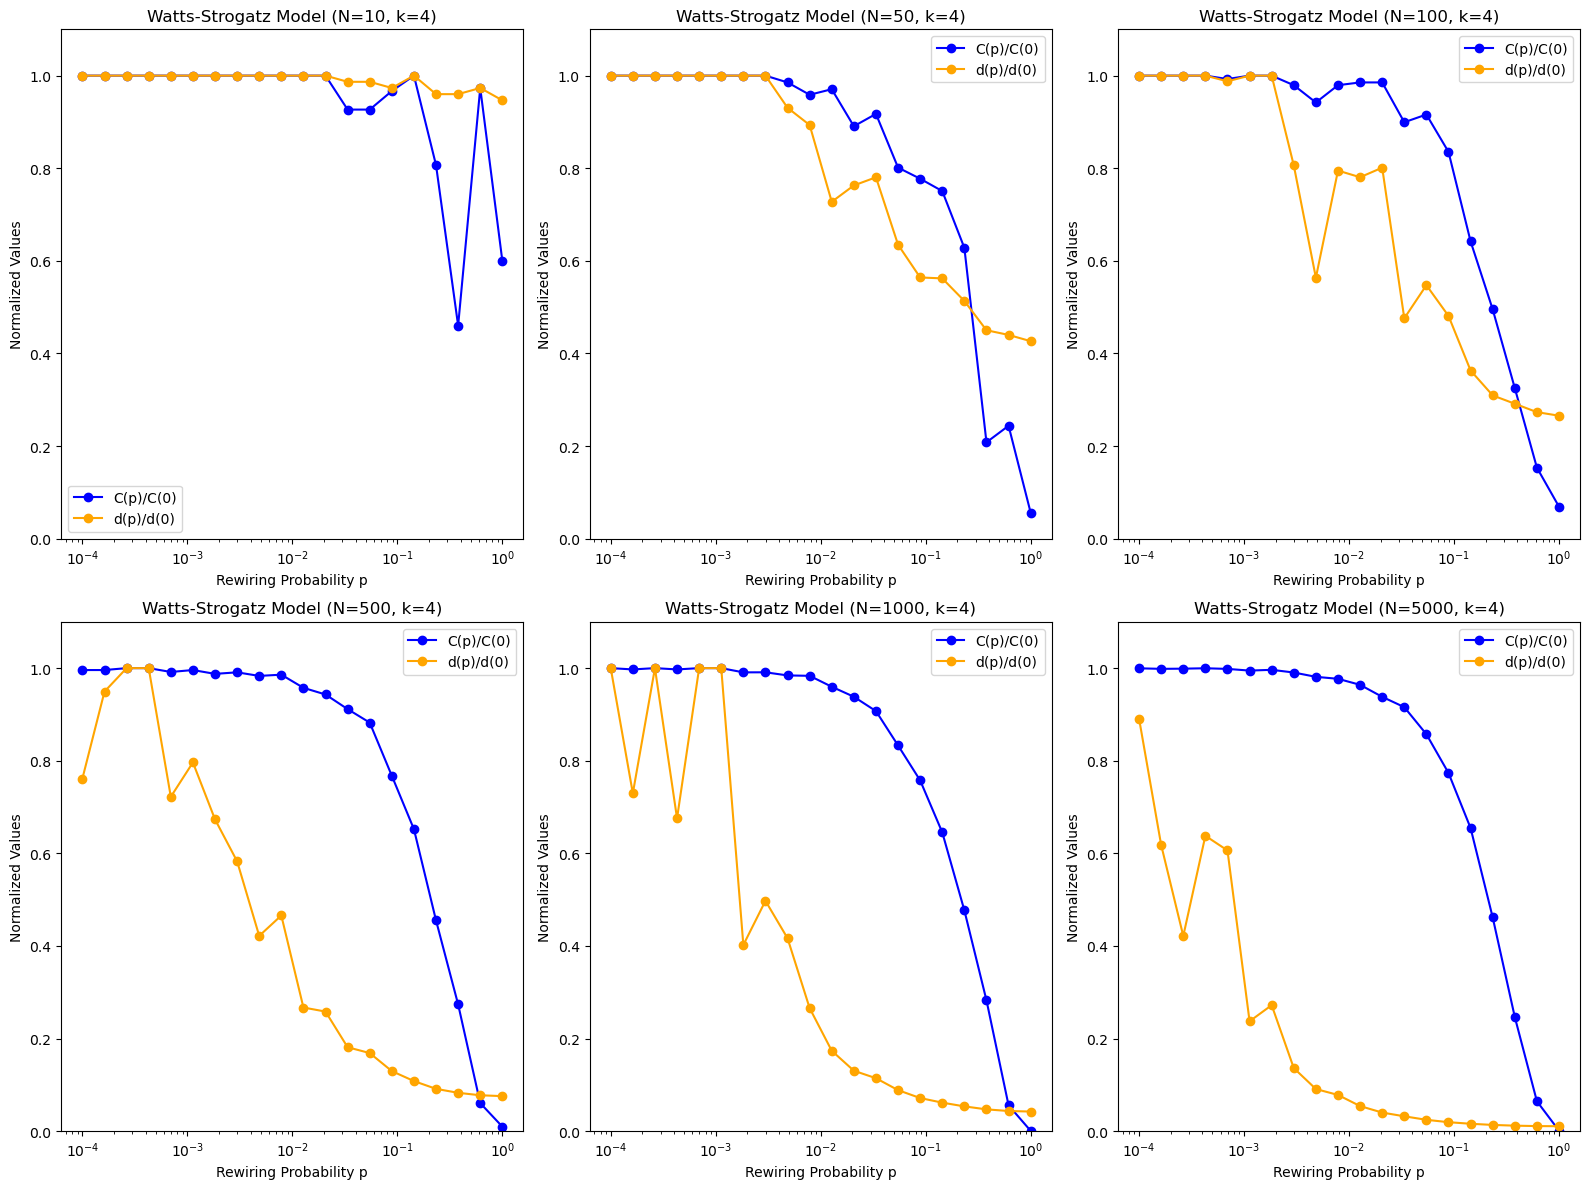

In [5]:
k = 4
ps = np.logspace(-4, 0, 20)  
Ns = [10, 50, 100, 500, 1000, 5000]

fig, axes = plt.subplots(2, 3, figsize=(16, 12))
for i, N in enumerate(Ns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    G0 = nx.watts_strogatz_graph(n=N, k=k, p=0)
    C0 = my_clustering_coefficient(G0)
    d0 = nx.average_shortest_path_length(G0)

    norm_Cs = []
    norm_ds = []

    for p in ps:
        G = nx.watts_strogatz_graph(n=N, k=k, p=p)
        C = my_clustering_coefficient(G)
        try:
            d = nx.average_shortest_path_length(G)
        except nx.NetworkXError:
            d = float('inf')
        
        norm_C = C / C0
        norm_d = d / d0 if d != float('inf') else float('inf')
        norm_Cs.append(norm_C)
        norm_ds.append(norm_d)

    ax.plot(ps, norm_Cs, label='C(p)/C(0)', marker='o', color='blue')
    ax.plot(ps, norm_ds, label='d(p)/d(0)', marker='o', color='orange')
    ax.set_xscale('log')
    ax.set_xlabel('Rewiring Probability p')
    ax.set_ylabel('Normalized Values')
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.set_title(f'Watts-Strogatz Model (N={N}, k={k})')

plt.tight_layout()
plt.show()

### Remarks

As N goes to infinity, less and less rewiring probability is enough to drastically reduce average path length between nodes, meaning that at large networks, it is enoght to connect very few nodes randomly to get a small-world network. The clustering coefficient, however, remains high for small p even at large N, meaning that the network retains its local clustering properties even when it becomes a small-world network.